In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.shape

(205, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [6]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

### There are no null values in the dataset

### 1.  check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

### a) Relation between Advertisement Company 1 and Profit

<AxesSubplot:xlabel='Add1(in Thousands)', ylabel='Profit(in Thousands)'>

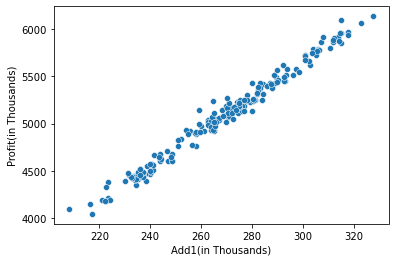

In [7]:
sns.scatterplot(x=data['Add1(in Thousands)'],y=data['Profit(in Thousands)'])

### b) Relation between Advertisement Company 2 and Profit

<AxesSubplot:xlabel='Add2(in Thousands)', ylabel='Profit(in Thousands)'>

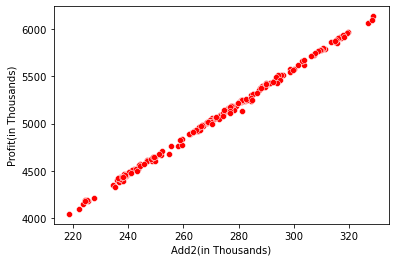

In [8]:

sns.scatterplot(x=data['Add2(in Thousands)'],y=data[ 'Profit(in Thousands)'],color='red')

### c) Relation between Advertisement Company 3 and Profit

<AxesSubplot:xlabel='Add3(in Thousands)', ylabel='Profit(in Thousands)'>

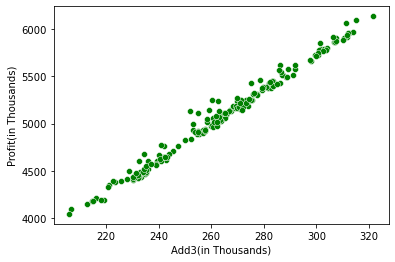

In [9]:
sns.scatterplot(x=data['Add3(in Thousands)'],y=data[ 'Profit(in Thousands)'],color='green')

### d) Relation between Advertisement Company 4 and Profit

<AxesSubplot:xlabel='Add4(in Thousands)', ylabel='Profit(in Thousands)'>

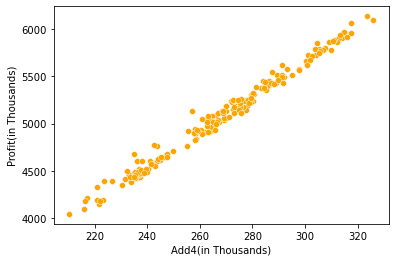

In [10]:
sns.scatterplot(x=data['Add4(in Thousands)'],y=data[ 'Profit(in Thousands)'],color='orange')

### e) Relation between Advertisement Company 5 and Profit

<AxesSubplot:xlabel='Add5(in Thousands)', ylabel='Profit(in Thousands)'>

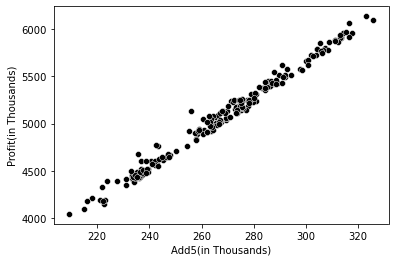

In [11]:
sns.scatterplot(x=data['Add5(in Thousands)'],y=data[ 'Profit(in Thousands)'],color='black')

<AxesSubplot:>

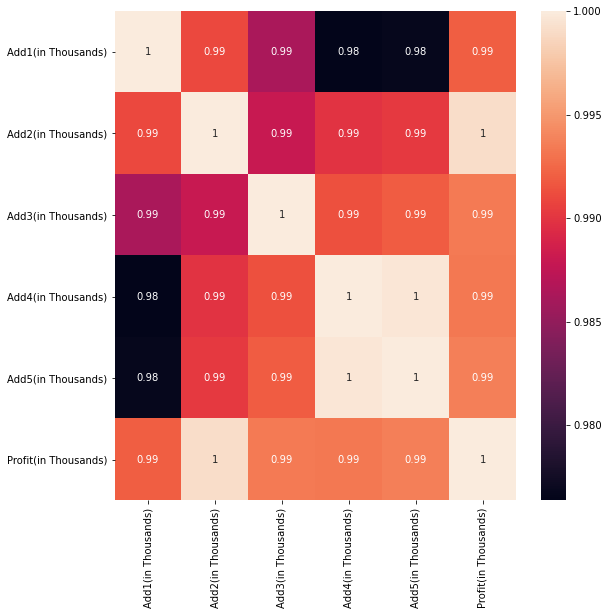

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)

### Inference:
1) From the scatterplots and correlations we can observe that there exists linear relationship between spending on each advertisement companies and profit.

2) Spending on advertisement company 2 and profit has a very perfect linear relation and their correlation coefficient is 1.

In [13]:
# To split the dataset into independent features and dependent feature

x=data.drop(['Date','Profit(in Thousands)'],axis=1) # Independent features
y=data['Profit(in Thousands)'] # Dependent feature

In [14]:
x

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [15]:
# To split the dataset into training dataset and testing dataset


from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape

(164, 5)

In [18]:
x_test.shape

(41, 5)

In [19]:
y_train.shape

(164,)

In [20]:
y_test.shape

(41,)

In [21]:
# To import the linear regression model

from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
# Fitting the training data

lr.fit(x_train,y_train)

LinearRegression()

In [24]:
# predicting the tesing data

y_pred=lr.predict(x_test)

In [25]:
y_pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [26]:
# to evaluate the model using the evaluation metrics

from sklearn.metrics import mean_squared_error,r2_score

In [27]:
mean_squared_error(y_test,y_pred)

1.1298076659260867e-24

In [29]:
# Rounding of the mean squared value

round(mean_squared_error(y_test,y_pred),10) 


0.0

In [30]:
r=r2_score(y_test,y_pred)
print('R-Squared value:',r)

R-Squared value: 1.0


###  Inference:
1) The mean squared error between the actual values and predicted values is 1.1298076659260867e-24.

   This is a very negigible error as it rounds off to zero.
   
2) The R-squared value or coefficient of determination is 1.

   This indicates that the given linear fitting is the best fit for the given data.

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


In [31]:
lr.predict(x_test)

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [32]:
x_test=np.array([290, 312 ,309, 298 ,320]).reshape(1,-1)

In [33]:
lr.predict(x_test)

array([5820.06])

### Inference:
The predicted value for profits is 5820.06(in Thousands)